In [ ]:
! pip uninstall -y -q tensorflow
! pip install -q tensorflow-gpu==2.8.0
! pip install -q deepmatch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 51.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.19.2 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.2/141.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 25

# DeepFM With Estimator

In [290]:
import pandas as pd
import numpy as np
import sklearn

In [291]:
df_org = pd.read_csv('/content/ad_10000records.csv')
df = df_org
df.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0


In [292]:
df = df.rename(columns = {'Daily Time Spent on Site':'daily_time_on_site',
                          'Daily Internet Usage':'Daily_Internet_Usage',
                          'Area Income':'Area_Income',
                          'Ad Topic Line':'Ad_Topic_Line',
                          'Clicked on Ad':'Clicked_on_Ad'})
df.head(2)

,daily_time_on_site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Gender,Country,Timestamp,Clicked_on_Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0


In [293]:
df['daily_time_on_site'] = df['daily_time_on_site'].astype(float)
df['Daily_Internet_Usage'] = df['Daily_Internet_Usage'].astype(float)
df['Area_Income'] = df['Area_Income'].astype(float)
df['Ad_Topic_Line'] = df['Ad_Topic_Line'].astype(str)
df['Clicked_on_Ad'] = df['Clicked_on_Ad'].astype(int)
df['Country'] = df['Country'].astype(str)
df['City'] = df['City'].astype(str)

In [294]:
# getting sparse features
numerical_features = ['daily_time_on_site','Age', 'Area_Income', 'Daily_Internet_Usage']
sparse_features = ['Ad_Topic_Line', 'City', 'Gender', 'Country']
target = ['Clicked_on_Ad']

<Axes: title={'center': 'Daily Time Spent on Site'}, ylabel='Frequency'>

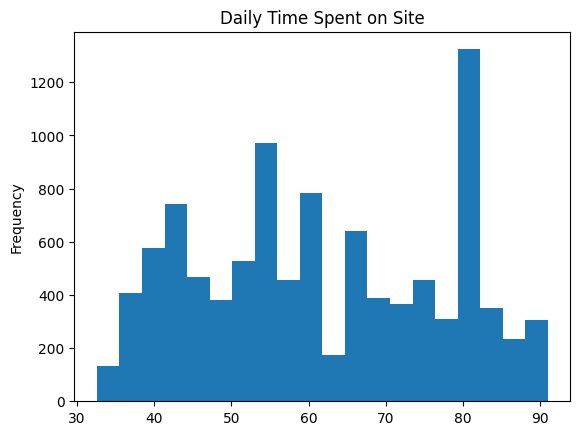

In [295]:
from matplotlib import pyplot as plt
df['daily_time_on_site'].plot(kind='hist', bins=20, title='Daily Time Spent on Site')


<Axes: xlabel='Age', ylabel='Clicked on Ad'>

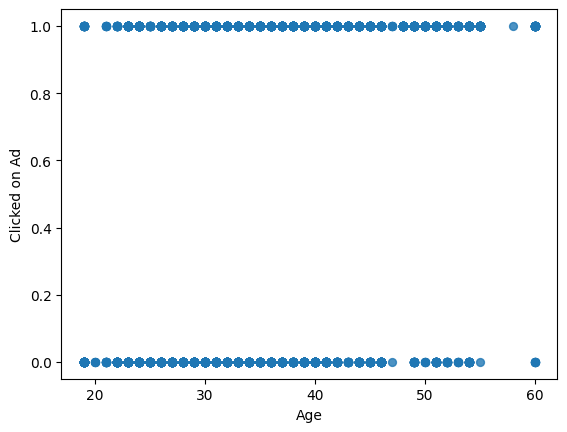

In [349]:
df_org.plot(kind='scatter', x='Age', y='Clicked on Ad', s=32, alpha=.8)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   daily_time_on_site    10000 non-null  float64
 1   Age                   10000 non-null  float64
 2   Area_Income           10000 non-null  float64
 3   Daily_Internet_Usage  10000 non-null  float64
 4   Ad_Topic_Line         10000 non-null  object 
 5   City                  10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Country               10000 non-null  object 
 8   Timestamp             10000 non-null  object 
 9   Clicked_on_Ad         10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


<Axes: xlabel='daily_time_on_site', ylabel='Age'>

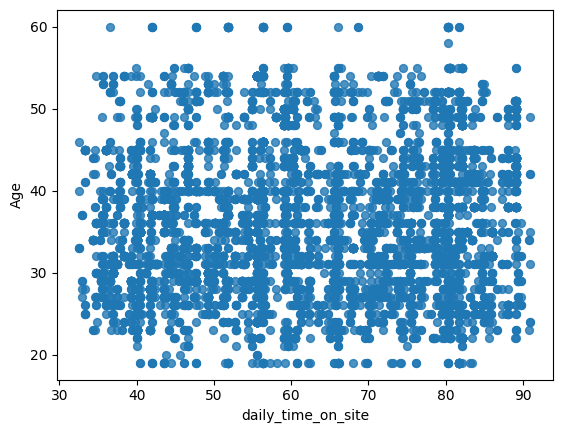

In [297]:
df.plot(kind='scatter', x='daily_time_on_site', y='Age', s=32, alpha=.8)

In [298]:
for col in df.columns:
  print(df[col].isna().sum())

0
0
0
0
0
0
0
0
0
0


## Getting number of unique elements in each columns

In [299]:
df.columns

Index(['daily_time_on_site', 'Age', 'Area_Income', 'Daily_Internet_Usage',
       'Ad_Topic_Line', 'City', 'Gender', 'Country', 'Timestamp',
       'Clicked_on_Ad'],
      dtype='object')

In [300]:
unique_elements = []
for col in sparse_features:
  unique_elements.append((col, df[col].nunique()))
unique_elements

[('Ad_Topic_Line', 559), ('City', 521), ('Gender', 2), ('Country', 207)]

In [301]:
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from deepctr.models import *
import deepctr

### Checking the shapes of the Series of each columns

In [325]:
df_org['City'], df_org['Country']

(0              Lisafort
 1       West Angelabury
 2             Reyesfurt
 3           New Michael
 4          West Richard
              ...       
 9995    West Angelabury
 9996        Kennedyfurt
 9997        North Randy
 9998     North Samantha
 9999       Port Jeffrey
 Name: City, Length: 10000, dtype: object,
 0       Svalbard & Jan Mayen Islands
 1                          Singapore
 2                         Guadeloupe
 3                             Zambia
 4                              Qatar
                     ...             
 9995                       Singapore
 9996                      Luxembourg
 9997                           Egypt
 9998                          Malawi
 9999        Northern Mariana Islands
 Name: Country, Length: 10000, dtype: object)

In [305]:
label_encoders['Ad_Topic_Line'].transform(['Total 5thgeneration standardization'])

array([484])

In [304]:
# giving each unique feature a label for easier differentiation

# 1. Label Encoding: storing the label encoders for output comparison
label_encoders = {}
for feature in sparse_features:
  lbe = LabelEncoder()
  df[feature] = lbe.fit_transform(df[feature])
  label_encoders[feature] = lbe

# 2. Standard Scaling for Numerical Features
scalers = {}
for feature in numerical_features:
  scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0,1))
  df[feature] = scaler.fit_transform(df[feature].values.reshape(-1,1))
  scalers[feature] = scaler


In [306]:
fixed_length_feature_columns = [deepctr.feature_column.SparseFeat(feature, df[feature].max() + 1, embedding_dim=3) for feature in sparse_features]

#adding numerical features to above feature columns
fixed_length_feature_columns += [deepctr.feature_column.DenseFeat(feature, 1) for feature in numerical_features]

linear_feature_columns = fixed_length_feature_columns
dnn_feature_columns = fixed_length_feature_columns

In [307]:
feature_names = deepctr.feature_column.get_feature_names(fixed_length_feature_columns+dnn_feature_columns)

In [308]:
train, test = train_test_split(df, test_size=0.2)
train.shape, test.shape

((8000, 10), (2000, 10))

In [309]:
from itertools import islice

def take(iterables, n):
  return list(islice(iterables, n).items())

In [310]:
from deepctr.estimator.inputs import input_fn_pandas

In [311]:
train_model_input = {name:train[name] for name in feature_names}
test_model_input = {name:test[name] for name in feature_names}
type(train_model_input),type( test_model_input),

(dict, dict)

In [312]:
model = NFM(linear_feature_columns, dnn_feature_columns, task='regression')
model.compile('adam','mse', metrics=['mse', 'accuracy'])

In [313]:
epochs = 20
batch_size = 256

In [314]:
history = model.fit(train_model_input, train[target].values,
                        batch_size=batch_size, epochs=epochs, verbose=2, validation_split=0.2, )

Epoch 1/20
25/25 - 2s - loss: 0.2160 - mse: 0.2160 - accuracy: 0.6730 - val_loss: 0.1844 - val_mse: 0.1844 - val_accuracy: 0.7163
Epoch 2/20
25/25 - 0s - loss: 0.1684 - mse: 0.1684 - accuracy: 0.7581 - val_loss: 0.1644 - val_mse: 0.1644 - val_accuracy: 0.7638
Epoch 3/20
25/25 - 0s - loss: 0.1465 - mse: 0.1465 - accuracy: 0.7955 - val_loss: 0.1400 - val_mse: 0.1399 - val_accuracy: 0.8019
Epoch 4/20
25/25 - 0s - loss: 0.1137 - mse: 0.1136 - accuracy: 0.8442 - val_loss: 0.1006 - val_mse: 0.1005 - val_accuracy: 0.8656
Epoch 5/20
25/25 - 0s - loss: 0.0859 - mse: 0.0858 - accuracy: 0.8942 - val_loss: 0.0923 - val_mse: 0.0922 - val_accuracy: 0.8706
Epoch 6/20
25/25 - 0s - loss: 0.0771 - mse: 0.0769 - accuracy: 0.9030 - val_loss: 0.0905 - val_mse: 0.0904 - val_accuracy: 0.8769
Epoch 7/20
25/25 - 0s - loss: 0.0716 - mse: 0.0714 - accuracy: 0.9094 - val_loss: 0.0897 - val_mse: 0.0895 - val_accuracy: 0.8800
Epoch 8/20
25/25 - 0s - loss: 0.0684 - mse: 0.0682 - accuracy: 0.9137 - val_loss: 0.0899 -

In [315]:
pred_ans = model.predict(test_model_input, batch_size=256)
print("test MSE", round(sklearn.metrics.mean_squared_error(test[target].values, pred_ans), 4))

test MSE 0.0918


In [316]:
# Extract values
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

<ipython-input-317-18e194bd7217>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b-', label='Training loss', color='blue')
<ipython-input-317-18e194bd7217>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'r--', label='Validation loss', color='lightcoral')
<ipython-input-317-18e194bd7217>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'b-', label='Training accuracy', color='darkblue')
<ipython-input-317-18e194bd7217>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take prece

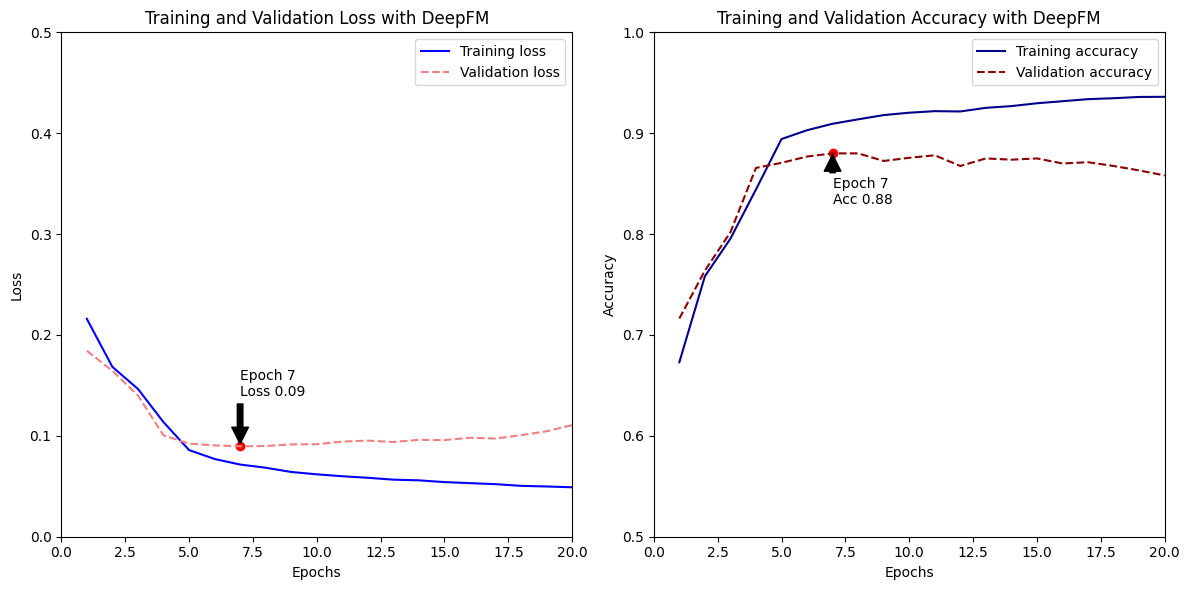

In [317]:
epochs_list = list(range(1, 21))

#getting lowest val_loss
min_loss_epoch = epochs[val_loss.index(min(val_loss))]
min_loss_value = min(val_loss)

# getting highest val accuracy
max_acc_epoch = epochs[val_accuracy.index(max(val_accuracy))]
max_acc_value = max(val_accuracy)

# Plotting the Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Training loss', color='blue')
plt.plot(epochs, val_loss, 'r--', label='Validation loss', color='lightcoral')
plt.scatter(min_loss_epoch, min_loss_value, color='red')  # Red dot at minimum validation loss
plt.annotate(f'Epoch {min_loss_epoch}\nLoss {min_loss_value:.2f}',
             xy=(min_loss_epoch, min_loss_value),
             xytext=(min_loss_epoch, min_loss_value + 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Training and Validation Loss with DeepFM')
ax = plt.gca()
ax.set_xlim([0,20])
ax.set_ylim([0,0.5])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b-', label='Training accuracy', color='darkblue')
plt.plot(epochs, val_accuracy, 'r--', label='Validation accuracy', color='darkred')
plt.scatter(max_acc_epoch, max_acc_value, color='red')  # Red dot at maximum validation accuracy
plt.annotate(f'Epoch {max_acc_epoch}\nAcc {max_acc_value:.2f}',
             xy=(max_acc_epoch, max_acc_value),
             xytext=(max_acc_epoch, max_acc_value - 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Training and Validation Accuracy with DeepFM')
ax = plt.gca()
ax.set_xlim([0,20])
ax.set_ylim([0.5,1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Checking the predicted advertisement clicks with random data

In [341]:
user_input = {
  'daily_time_on_site':[ 120, 100],
  'Age':[ 26, 33],
  'Area_Income':[ 5000, 100],
  'Daily_Internet_Usage':[ 150, 700],
  'Ad_Topic_Line':['Optional full-range projection','Realigned content-based leverage'],
  'City':[ 'West Richard', 'Lisafort'],
  'Gender':['Female', 'Male'],
  'Country':['Singapore', 'Malawi']
}
test_df = pd.DataFrame(user_input)
test_df.head()

,daily_time_on_site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Gender,Country
0,120,26,5000,150,Optional full-range projection,West Richard,Female,Singapore
1,100,33,100,700,Realigned content-based leverage,Lisafort,Male,Malawi


In [342]:
for feature in sparse_features:
  print(feature)
  test_df[feature] = label_encoders[feature].transform(test_df[feature])
for feature in numerical_features:
  test_df[feature] = scalers[feature].transform(test_df[feature].values.reshape(-1, 1))

# preparing user inputs to the model
user_input_model = {name:test_df[name] for name in feature_names}
user_input_model

Ad_Topic_Line
City
Gender
Country


{'Ad_Topic_Line': 0    301
 1    396
 Name: Ad_Topic_Line, dtype: int64,
 'City': 0    495
 1    234
 Name: City, dtype: int64,
 'Gender': 0    0
 1    1
 Name: Gender, dtype: int64,
 'Country': 0    166
 1    108
 Name: Country, dtype: int64,
 'daily_time_on_site': 0    1.497345
 1    1.154703
 Name: daily_time_on_site, dtype: float64,
 'Age': 0    0.170732
 1    0.341463
 Name: Age, dtype: float64,
 'Area_Income': 0   -0.137696
 1   -0.212693
 Name: Area_Income, dtype: float64,
 'Daily_Internet_Usage': 0    0.271822
 1    3.610416
 Name: Daily_Internet_Usage, dtype: float64}

In [343]:
# matching the random test data with the format of model input data

all_keys_train = list(train_model_input.values())
all_keys_inp = list(user_input_model.values())
print(type(all_keys_train[0]), all_keys_train[0].shape)
type(all_keys_inp[0]), all_keys_inp[0].shape

<class 'pandas.core.series.Series'> (8000,)


(pandas.core.series.Series, (2,))

### Error in inference shapes

In [344]:
user_input_model

{'Ad_Topic_Line': 0    301
 1    396
 Name: Ad_Topic_Line, dtype: int64,
 'City': 0    495
 1    234
 Name: City, dtype: int64,
 'Gender': 0    0
 1    1
 Name: Gender, dtype: int64,
 'Country': 0    166
 1    108
 Name: Country, dtype: int64,
 'daily_time_on_site': 0    1.497345
 1    1.154703
 Name: daily_time_on_site, dtype: float64,
 'Age': 0    0.170732
 1    0.341463
 Name: Age, dtype: float64,
 'Area_Income': 0   -0.137696
 1   -0.212693
 Name: Area_Income, dtype: float64,
 'Daily_Internet_Usage': 0    0.271822
 1    3.610416
 Name: Daily_Internet_Usage, dtype: float64}

In [345]:
# Predict the rating
predicted_rating = model.predict(user_input_model)
print("Predicted click rate:", predicted_rating[0][0], predicted_rating[1][0])

Predicted click rate: 0.15723795 0.10022566


# Hence, it can be observed that multiple users with different status have separate click rate prediction on the ads by trained model of Neural Factorization Machine.